In [1]:
%matplotlib inline


# Faces dataset decompositions


This example applies to `olivetti_faces_dataset` different unsupervised
matrix decomposition (dimension reduction) methods from the module
:py:mod:`sklearn.decomposition` (see the documentation chapter
`decompositions`) .


Automatically created module for IPython interactive environment
(400, 4096)
Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.144s
Extracting the top 6 Non-negative components - NMF...
done in 0.057s
Extracting the top 6 Independent components - FastICA...
done in 0.222s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 1.022s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 0.736s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.095s
Extracting the top 6 Factor Analysis components - FA...
done in 0.130s


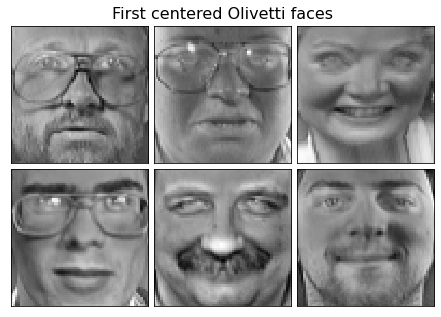

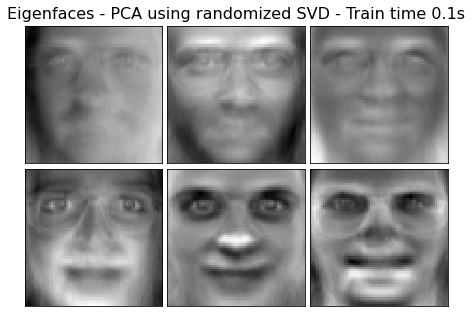

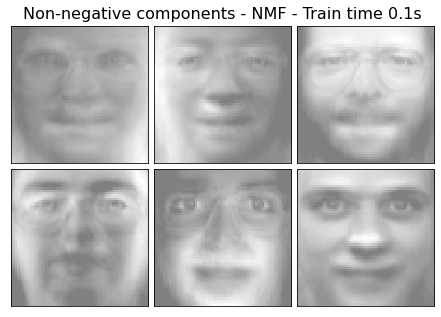

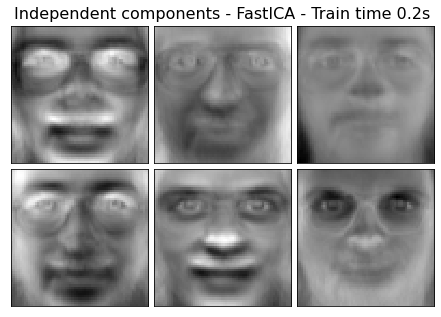

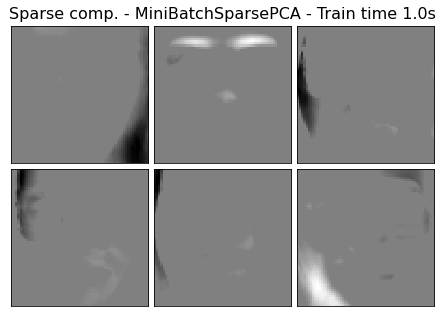

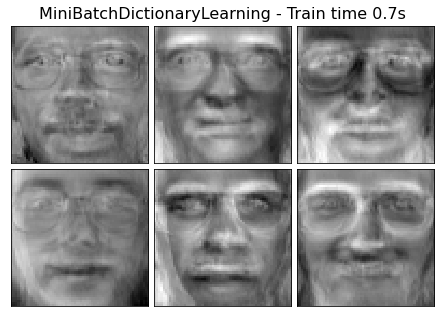

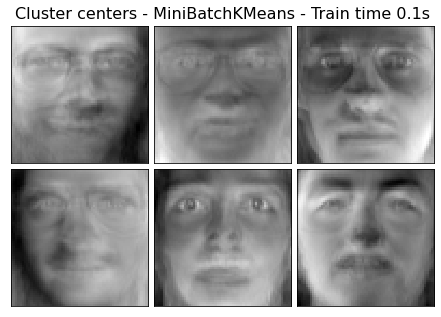

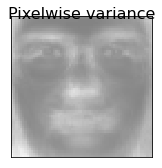

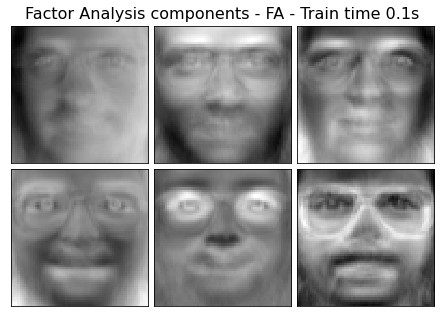

In [2]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=rng)
n_samples, n_features = faces.shape
print(faces.shape)

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=20),
     True),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()

# Análisis Identico al de MNIST

In [3]:
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.linalg import svd
from tabulate import tabulate

from timeit import default_timer as timer

In [8]:
## Calculamos SVD de nuestra BBDD.
data = faces
U, s, VT = svd(data)

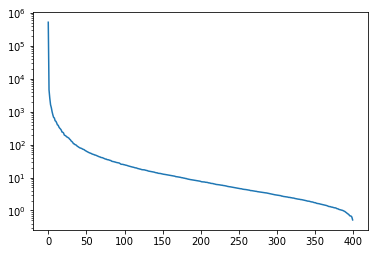

In [9]:
# Plot de los Autovalores
plt.yscale("log")
plt.plot((s*s))

In [26]:
# FUENTE: https://en.wikipedia.org/wiki/Principal_component_analysis#Compute_the_cumulative_energy_content_for_each_eigenvector
Total = sum(s)
NFEAT = 10
for i in range(2, 51, 2):
    if (i == NFEAT):
        print("Tomamos %d componentes" % (i) + " y nos queda un %2.2f" % (100*(sum(s[:i])/Total)) +  " % de la varianza total" + " <--------- ELEGIDA ")
    else:
        print("Tomamos %d componentes" % (i) + " y nos queda un %2.2f" % (100*(sum(s[:i])/Total)) +  " % de la varianza total")
    
print("\n-------------Muchas Componentes-------------\n")
    
for i in range(100, 4000, 100):
    print("Tomamos %d componentes" % (i) + " y nos queda un %2.2f" % (100*(sum(s[:i])/Total)) +  " % de la varianza total")

Tomamos 2 componentes y nos queda un 30.46 % de la varianza total
Tomamos 4 componentes y nos queda un 33.98 % de la varianza total
Tomamos 6 componentes y nos queda un 36.61 % de la varianza total
Tomamos 8 componentes y nos queda un 38.72 % de la varianza total
Tomamos 10 componentes y nos queda un 40.59 % de la varianza total <--------- ELEGIDA 
Tomamos 12 componentes y nos queda un 42.29 % de la varianza total
Tomamos 14 componentes y nos queda un 43.83 % de la varianza total
Tomamos 16 componentes y nos queda un 45.23 % de la varianza total
Tomamos 18 componentes y nos queda un 46.55 % de la varianza total
Tomamos 20 componentes y nos queda un 47.74 % de la varianza total
Tomamos 22 componentes y nos queda un 48.87 % de la varianza total
Tomamos 24 componentes y nos queda un 49.93 % de la varianza total
Tomamos 26 componentes y nos queda un 50.94 % de la varianza total
Tomamos 28 componentes y nos queda un 51.92 % de la varianza total
Tomamos 30 componentes y nos queda un 52.85 % 

Automatically created module for IPython interactive environment
(400, 4096)
Dataset consists of 400 numbers
Extracting the top 50 PCA using randomized SVD...
0.002437486
done in 0.069s
Extracting the top 50 Non-negative components - NMF...
0.0028936951
done in 1.483s
Extracting the top 50 Independent components - FastICA...
0.0024314618784627194
done in 0.201s


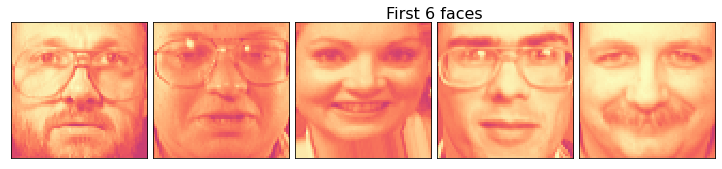

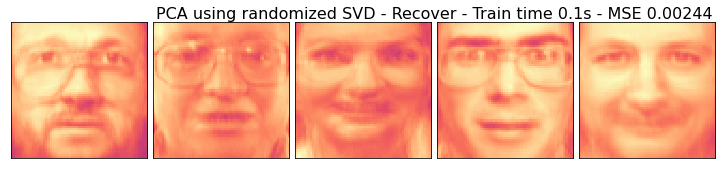

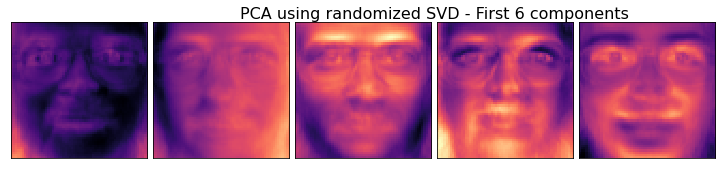

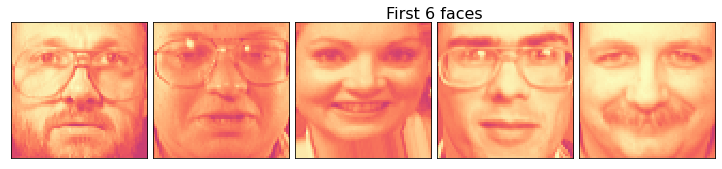

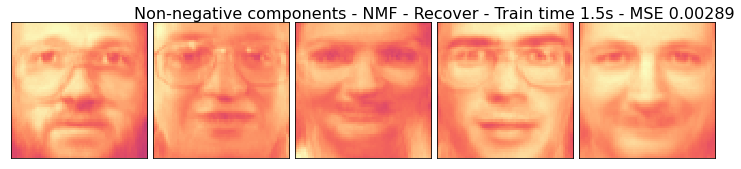

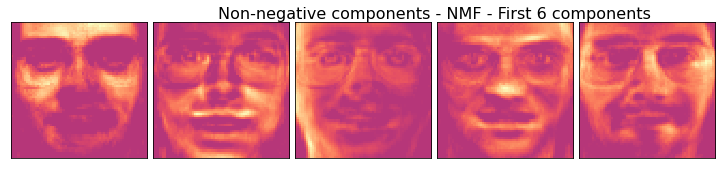

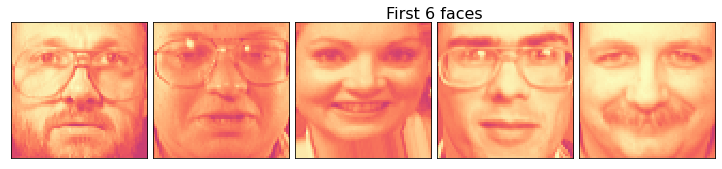

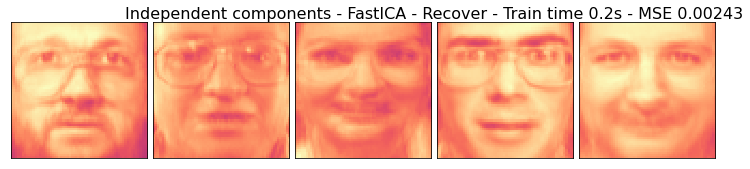

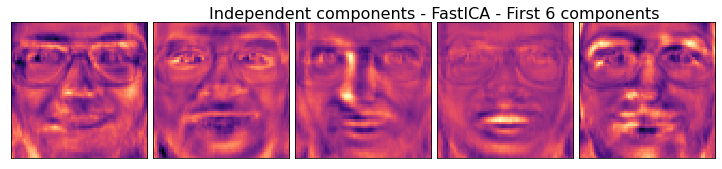

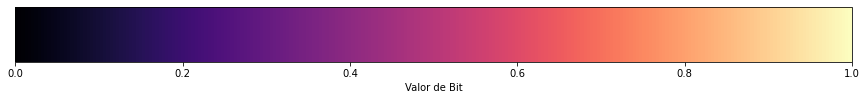

In [31]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
import matplotlib as mpl

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

rng = RandomState(0)

n_row, n_col = 1,6
n_components = 50
image_shape = (64, 64)
data = faces


n_samples, n_features = data.shape
print(data.shape)



print("Dataset consists of %d numbers" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=mpl.cm.magma):
    plt.figure(figsize=(2. * n_col, 2.36 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components,  init='random', random_state=0,  tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),
]

# #############################################################################
# Plot a sample of the input data
nplot = 5

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    if center:
        data = data
    estimator.fit(data)
    train_time = (time() - t0)
    data_transform = estimator.transform(data)
    recover = estimator.inverse_transform(data_transform)
    error = mean_squared_error(data, recover)
    print(error)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)

    plot_gallery("First 6 faces", data[:nplot])
    
    plot_gallery('%s - Recover - Train time %.1fs - MSE %.5f' % (name, train_time, error),
                 recover[:nplot])
    
    plot_gallery('%s - First 6 components' % (name),
                 components_[:nplot])
    
    

fig, ax = plt.subplots(figsize=(15, 2))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.magma
norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Valor de Bit')

plt.show()

In [32]:
%%html
<style>
.output_wrapper, .output {
       height:auto !important;
       max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
       box-shadow:none !important;
       webkit-box-shadow:none !important;
}
</style>